# Analysis - exp25-28

- Transfer to Nim and Euclid

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_stumbler_data(path, index_range=(0, 20)):
    exps = []
    runs = range(index_range[0], index_range[1])
    for r in runs:
        files = sorted(glob(os.path.join(path, 
            "run_{}_episode*_stumbler*".format(int(r)))))

        mon = join_monitored(files, sort_key='episode')
        exps.append(mon)
    return exps

# Find the files

In [2]:
path = "/Users/type/Code/azad/data/wythoff/exp25/"
exp_25 = load_stumbler_data(path, (1, 21))

path = "/Users/type/Code/azad/data/wythoff/exp26/"
exp_26 = load_stumbler_data(path, (1, 21))

path = "/Users/type/Code/azad/data/wythoff/exp27/"
exp_27 = load_stumbler_data(path, (1, 21))

path = "/Users/type/Code/azad/data/wythoff/exp28/"
exp_28 = load_stumbler_data(path, (1, 21))

In [3]:
pprint(exp_25[0].keys())
pprint(exp_26[0].keys())
pprint(exp_27[0].keys())
pprint(exp_28[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


In [4]:
episode_25, exp_25_avg, _ = score_summary(exp_25, key="total_reward")
episode_26, exp_26_avg, _ = score_summary(exp_26, key="total_reward")
episode_27, exp_27_avg, _ = score_summary(exp_27, key="total_reward")
episode_28, exp_28_avg, _ = score_summary(exp_28, key="total_reward")

# Plots

## Variations on V(s) projection

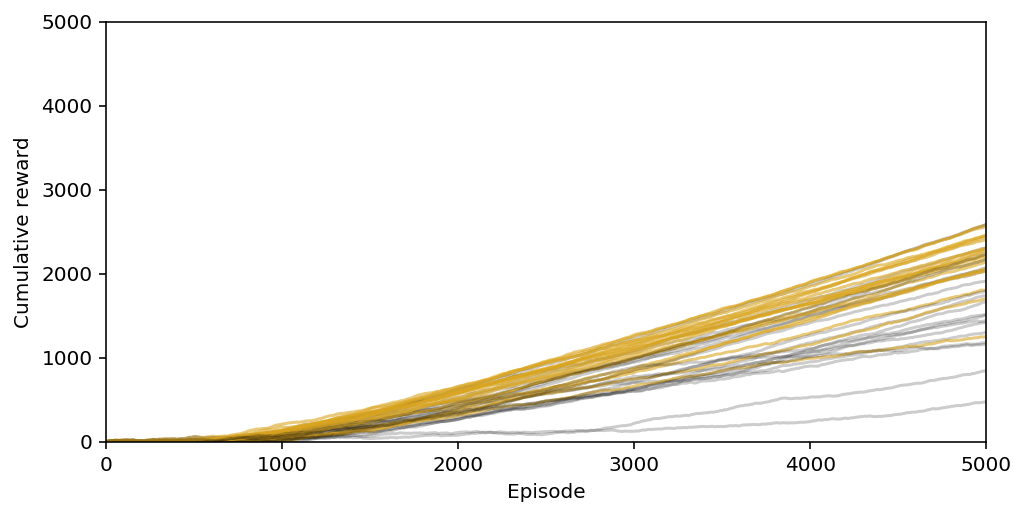

In [22]:
T = 5000
plt.figure(figsize=(7, 3.5))
for m1, m2 in zip(exp_25, exp_27):
    d1 = np.asarray(m1["total_reward"])
    d2 = np.asarray(m2["total_reward"])
    plt.plot(m1["episode"], d1, color="goldenrod", alpha=0.6)
    plt.plot(m2["episode"], d2, color="black", alpha=0.2)

_ = plt.tight_layout()
_ = plt.xlim(0, T)
_ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

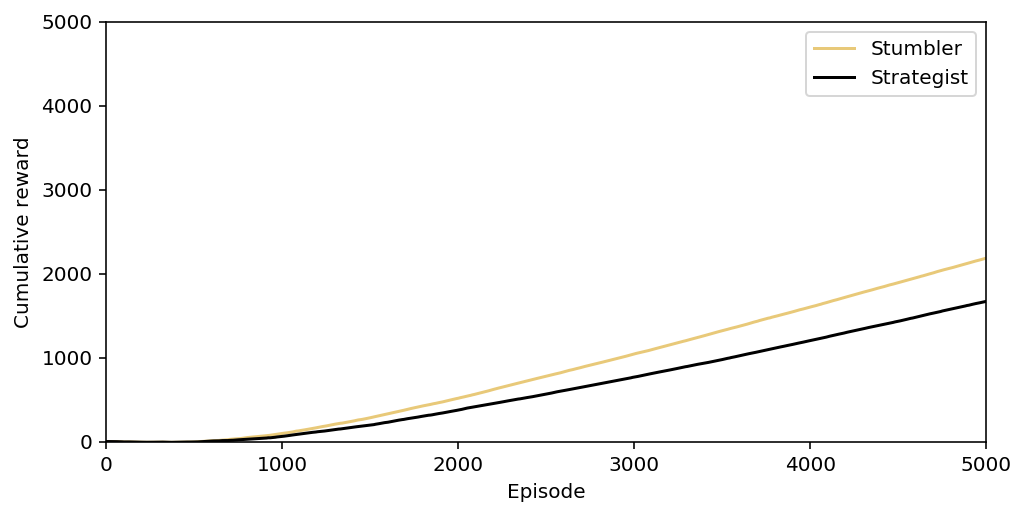

In [21]:
T = 5000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_25, exp_25_avg, color="goldenrod", alpha=0.6, label="Stumbler")
plt.plot(episode_27, exp_27_avg, color="black", alpha=1, label="Strategist")
_ = plt.legend()
_ = plt.tight_layout()
_ = plt.xlim(0, T)
_ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

/Users/type/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


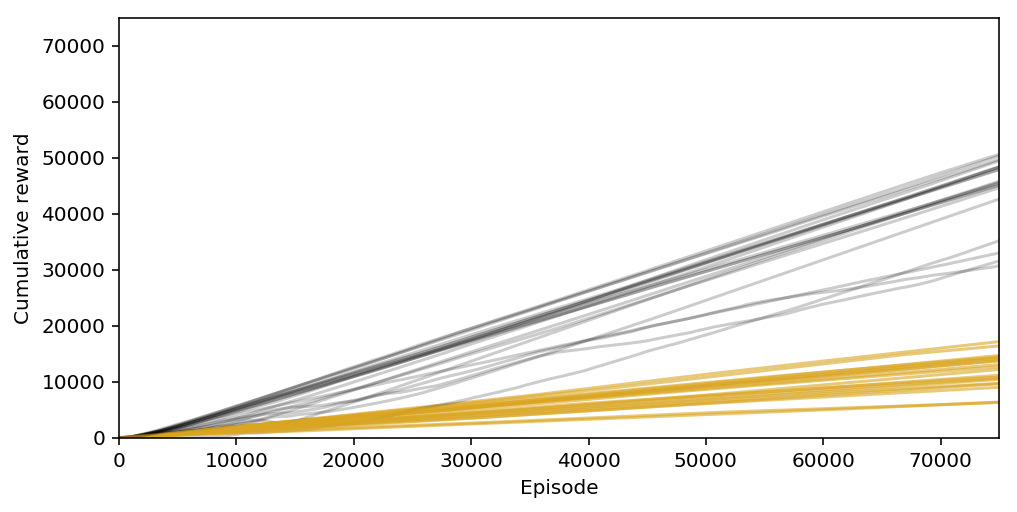

In [20]:
T = 75000
plt.figure(figsize=(7, 3.5))
for m1, m2 in zip(exp_26, exp_28):
    d1 = np.asarray(m1["total_reward"])
    d2 = np.asarray(m2["total_reward"])
    plt.plot(m1["episode"], d1, color="goldenrod", alpha=0.6)
    plt.plot(m2["episode"], d2, color="black", alpha=0.2)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlim(0, T)
_ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

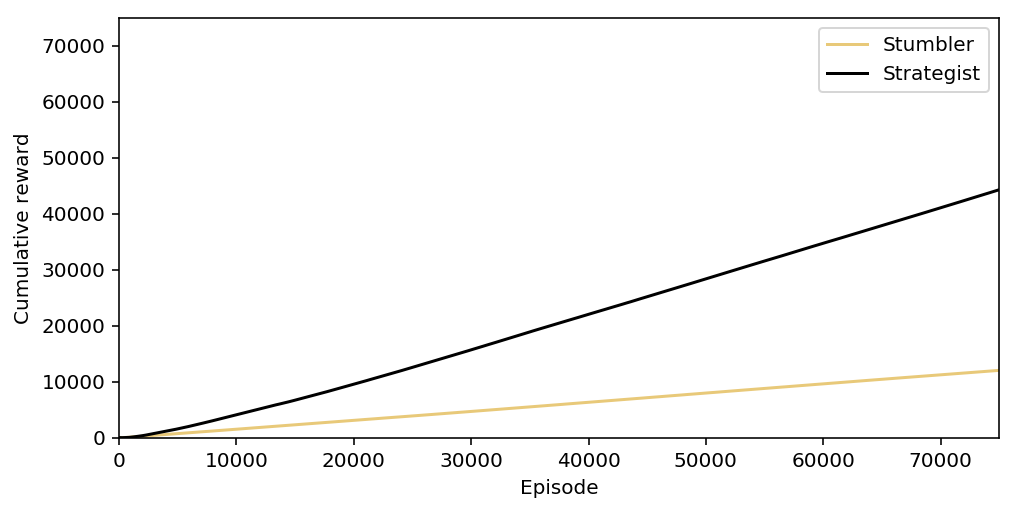

In [19]:
T = 75000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_26, exp_26_avg, color="goldenrod", alpha=0.6, label="Stumbler")
plt.plot(episode_28, exp_28_avg, color="black", alpha=1, label="Strategist")
_ = plt.legend()
_ = plt.tight_layout()
_ = plt.xlim(0, T)
_ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")